In [1]:
import pandas as pd
from library.sb_utils import save_file

This dataset is found from https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities. It contains the daily average temperature of various major cities around the world from 1995 to 2020.

In order to perform time series analysis on this dataset, the dataset must first be cleaned.

In [2]:
df = pd.read_csv('../data/city_temperature.csv')

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [4]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


We analyze each column to check for any null or incorrect/irregular values.

**Region**

In [5]:
df.Region.isnull().values.any()

False

In [6]:
df.Region.value_counts()

North America                        1556681
Europe                                381990
Asia                                  316663
Africa                                251118
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

**Country**

In [7]:
df.Country.isnull().values.any()

False

In [8]:
df.Country.value_counts()

US                   1455337
Canada                 74245
Australia              46330
China                  46329
India                  37063
                      ...   
Guyana                  5065
Israel                  4641
Burundi                 4543
Georgia                 4378
Serbia-Montenegro       3427
Name: Country, Length: 125, dtype: int64

**City**

In [9]:
df.City.isnull().values.any()

False

In [10]:
df.City.value_counts()

Portland         18530
Charleston       18530
Columbus         18530
Springfield      18530
Washington DC    18530
                 ...  
Frankfurt         4136
Flagstaff         3574
Pristina          3427
Yerevan           3226
Bonn              3133
Name: City, Length: 321, dtype: int64

**State**

In [11]:
df.State.isnull().values.any()

True

Since we don't need the State column for our analysis, we can drop it from our dataset.

In [12]:
df = df.drop(columns=['State'])

**AvgTemperature**

In [13]:
df.AvgTemperature.isnull().values.any()

False

In [14]:
df.AvgTemperature.value_counts()

-99.0    79672
 80.2     7442
 80.8     7362
 81.1     7247
 79.2     7241
         ...  
-39.3        1
-46.9        1
-43.4        1
-35.4        1
-40.0        1
Name: AvgTemperature, Length: 1517, dtype: int64

-99 Degrees Fahrenheit is unrealistic, so we assume it's a placeholder for null values and remove all rows with it accordingly.

In [15]:
#Remove rows with average temperature of -99
df.drop(df.loc[df['AvgTemperature']==-99].index, inplace=True)
df.AvgTemperature.value_counts()

 80.2    7442
 80.8    7362
 81.1    7247
 79.2    7241
 80.5    7223
         ... 
-39.3       1
-46.9       1
-43.4       1
-35.4       1
-33.9       1
Name: AvgTemperature, Length: 1516, dtype: int64

We can convert temperature from Fahrenheit to Celsius.

In [16]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [17]:
df.AvgTemperature = round((df.AvgTemperature - 32)*5/9, 1)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
1,Africa,Algeria,Algiers,1,2,1995,9.7
2,Africa,Algeria,Algiers,1,3,1995,9.3
3,Africa,Algeria,Algiers,1,4,1995,8.0
4,Africa,Algeria,Algiers,1,5,1995,8.8


**Year**

In [18]:
df.Year.isnull().values.any()

False

In [19]:
df.Year.value_counts()

2001    115277
2005    114775
2004    114597
2003    114283
2006    114201
2000    114169
2010    113642
2002    113616
1999    113406
2007    113180
2009    112977
1997    112952
1996    112734
2008    112724
2011    112407
1995    112152
2012    111165
1998    111102
2013    110228
2014    107860
2015    106809
2017    106421
2016    106403
2018    105748
2019    105085
2020     38742
Name: Year, dtype: int64

We should also remove rows with 2020 since there is a significant amount of data missing in 2020 compared to all the other years, and so the 2020 data may the weighted more strongly than the other years.

In [20]:
df.drop(df.loc[df['Year']==2020].index, inplace=True)

**Month**

In [21]:
df.Month.isnull().values.any()

False

In [22]:
df.Month.value_counts()

3     237332
7     237170
1     237064
10    236803
8     236652
5     236596
12    235134
4     229323
9     228865
11    228526
6     228132
2     216316
Name: Month, dtype: int64

**Day**

In [23]:
df.Day.isnull().values.any()

False

In [24]:
df.Day.value_counts()

8     91836
22    91830
27    91827
26    91784
3     91763
2     91758
12    91745
15    91740
14    91725
13    91717
11    91701
5     91699
7     91694
6     91693
4     91682
23    91677
16    91650
9     91556
17    91552
28    91548
1     91541
20    91530
25    91470
10    91434
21    91375
19    91360
18    91225
24    91046
29    85946
30    83736
31    53073
Name: Day, dtype: int64

All the columns appear to be fine now. We can then create a new column for the datetime object representing the date.

In [25]:
#Create the date column
date = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = pd.concat([df, date], axis=1)
df.rename(columns={0:'Date'}, inplace=True)
df

,Region,Country,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01
1,Africa,Algeria,Algiers,1,2,1995,9.7,1995-01-02
2,Africa,Algeria,Algiers,1,3,1995,9.3,1995-01-03
3,Africa,Algeria,Algiers,1,4,1995,8.0,1995-01-04
4,Africa,Algeria,Algiers,1,5,1995,8.8,1995-01-05
...,...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.0,2013-07-27
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.6,2013-07-28
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.0,2013-07-29
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.8,2013-07-30


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787913 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Region          object        
 1   Country         object        
 2   City            object        
 3   Month           int64         
 4   Day             int64         
 5   Year            int64         
 6   AvgTemperature  float64       
 7   Date            datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 191.4+ MB


Since average temperatures tend to vary during each particular season, seasons may be a useful feature for EDA, and so we can create a season column. 

In [27]:
#Create season column based on month
def get_season(month):
    if month >= 1 and month <= 3:
        return 'Winter'
    elif month >= 4 and month <= 6:
        return 'Spring'
    elif month >= 7 and month <= 9:
        return 'Summer'
    else: 
        return 'Fall'

df['Season'] = df.Month.apply(get_season)
df

,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Season
0,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01,Winter
1,Africa,Algeria,Algiers,1,2,1995,9.7,1995-01-02,Winter
2,Africa,Algeria,Algiers,1,3,1995,9.3,1995-01-03,Winter
3,Africa,Algeria,Algiers,1,4,1995,8.0,1995-01-04,Winter
4,Africa,Algeria,Algiers,1,5,1995,8.8,1995-01-05,Winter
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.0,2013-07-27,Summer
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.6,2013-07-28,Summer
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.0,2013-07-29,Summer
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.8,2013-07-30,Summer


In [28]:
df.Season.value_counts()

Summer    702687
Fall      700463
Spring    694051
Winter    690712
Name: Season, dtype: int64

Temperatures also vary based on a city's location, and so latitude and longitude may also be useful features for EDA.

In [29]:
#Create columns for latitude and longitude
#from geopy.exc import GeocoderTimedOut
#from geopy.geocoders import Nominatim

#Referenced from: https://www.geeksforgeeks.org/how-to-find-longitude-and-latitude-for-a-list-of-regions-or-country-using-python/

#Find latitude
#def get_geocode(city): 
#    try:
#        geolocator = Nominatim(user_agent="your_app_name")         
#        return geolocator.geocode(city)  
#    except GeocoderTimedOut:  
#        return get_geocode(city)

In [30]:
#df.City.replace(to_replace='Montvideo', value='Montevideo', inplace=True)
#cities = pd.DataFrame(df.City.value_counts().index.tolist())
#cities.rename(columns={0:'City'}, inplace=True)
#cities.City.replace(to_replace='Montvideo', value='Montevideo', inplace=True)
#cities

In [31]:
#longitude = []
#latitude = []

#for i in (cities.City):
      
#    if get_geocode(i) != None:
           
#        loc = get_geocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
#        latitude.append(loc.latitude)
#        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
#    else:
#        latitude.append(np.nan)
#        longitude.append(np.nan)

In [32]:
#cities["Latitude"] = latitude
#cities["Longitude"] = longitude
#cities

In [33]:
#df = df.merge(cities, on='City', how='left')
#df.head()

In [34]:
datapath = '../data'
save_file(df, 'city_temperature_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


In [35]:
df.Country.value_counts()

US                   1430057
Canada                 73698
China                  45470
Australia              45332
India                  36368
                      ...   
Serbia-Montenegro       3247
Sierra Leone            3064
Malawi                  2641
Guyana                  2136
Burundi                  884
Name: Country, Length: 125, dtype: int64

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

temp2 = df.groupby(by='Country').count().sort_values(by='AvgTemperature', ascending=False).head()
temp2 = temp2.City
temp2 = pd.DataFrame(temp2)
temp2.reset_index(inplace=True)
temp2.rename(columns={'City':'Count'}, inplace=True)
temp2

,Country,Count
0,US,1430057
1,Canada,73698
2,China,45470
3,Australia,45332
4,India,36368


Text(0.5, 1.0, 'Distribution For Top 5 Countries With Most Data')

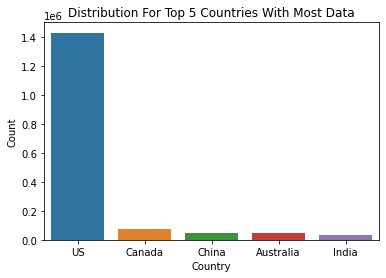

In [74]:
sns.barplot(x='Country', y='Count', data=temp2)
plt.title('Distribution For Top 5 Countries With Most Data')